First 5 Rows:


,CustomerID,Age,Gender,City,Education,MaritalStatus,AnnualIncome,SpendingScore,YearsEmployed,PurchaseFrequency,OnlineVisitsPerMonth,ReturnedItems,PreferredDevice,LastPurchaseAmount
0,1001,49,Male,Pune,Masters,Single,82953.0,66,23,19,9,2,Laptop,3944
1,1002,44,Male,Pune,PhD,Single,60610.0,56,22,1,23,3,Desktop,3885
2,1003,42,Male,Mumbai,Bachelors,Single,35501.0,44,18,10,29,3,Laptop,3247
3,1004,36,Female,Mumbai,Masters,Married,99312.0,36,10,12,21,3,Mobile,2028
4,1005,23,Male,Pune,Masters,Married,46980.0,56,1,18,9,3,Tablet,1100



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            255 non-null    int64  
 1   Age                   255 non-null    int64  
 2   Gender                255 non-null    object 
 3   City                  255 non-null    object 
 4   Education             243 non-null    object 
 5   MaritalStatus         255 non-null    object 
 6   AnnualIncome          243 non-null    float64
 7   SpendingScore         255 non-null    int64  
 8   YearsEmployed         255 non-null    int64  
 9   PurchaseFrequency     255 non-null    int64  
 10  OnlineVisitsPerMonth  255 non-null    int64  
 11  ReturnedItems         255 non-null    int64  
 12  PreferredDevice       255 non-null    object 
 13  LastPurchaseAmount    255 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 28.0+ KB


None


Statistical Summary:


,CustomerID,Age,AnnualIncome,SpendingScore,YearsEmployed,PurchaseFrequency,OnlineVisitsPerMonth,ReturnedItems,LastPurchaseAmount
count,255.000000,255.000000,243.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000
mean,1126.941176,37.729412,74499.901235,45.721569,14.682353,11.568627,16.078431,1.858824,2795.07451
std,72.397256,9.767842,43939.855655,17.869522,9.651664,7.077899,7.909536,1.409917,1328.77241
min,1001.000000,21.000000,16062.000000,5.000000,1.000000,1.000000,3.000000,0.000000,566.00000
25%,1064.500000,29.000000,56353.000000,34.500000,6.000000,5.000000,10.000000,1.000000,1542.50000
50%,1128.000000,38.000000,69629.000000,47.000000,15.000000,11.000000,16.000000,2.000000,2705.00000
75%,1190.500000,46.000000,84030.500000,57.500000,23.000000,18.000000,23.000000,3.000000,4001.00000
max,1250.000000,54.000000,474327.000000,95.000000,34.000000,24.000000,29.000000,4.000000,4996.00000



Missing Values Before Cleaning:


CustomerID               0
Age                      0
Gender                   0
City                     0
Education               12
MaritalStatus            0
AnnualIncome            12
SpendingScore            0
YearsEmployed            0
PurchaseFrequency        0
OnlineVisitsPerMonth     0
ReturnedItems            0
PreferredDevice          0
LastPurchaseAmount       0
dtype: int64


Missing Values After Cleaning:


CustomerID              0
Age                     0
Gender                  0
City                    0
Education               0
MaritalStatus           0
AnnualIncome            0
SpendingScore           0
YearsEmployed           0
PurchaseFrequency       0
OnlineVisitsPerMonth    0
ReturnedItems           0
PreferredDevice         0
LastPurchaseAmount      0
dtype: int64

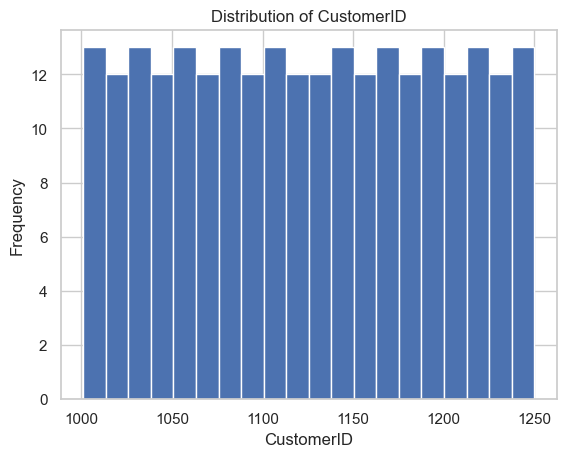

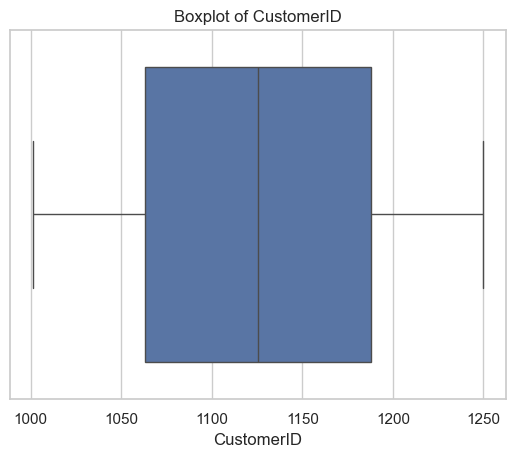

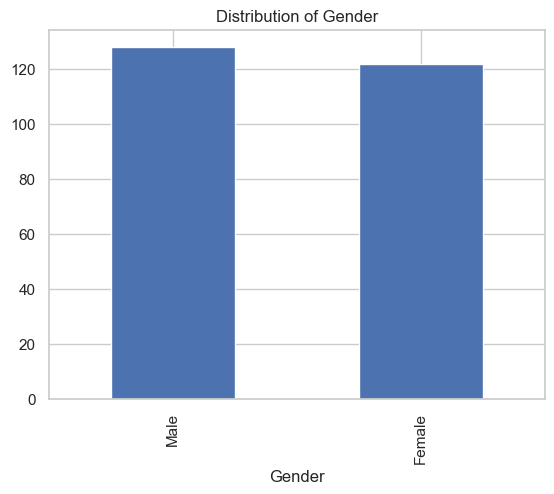

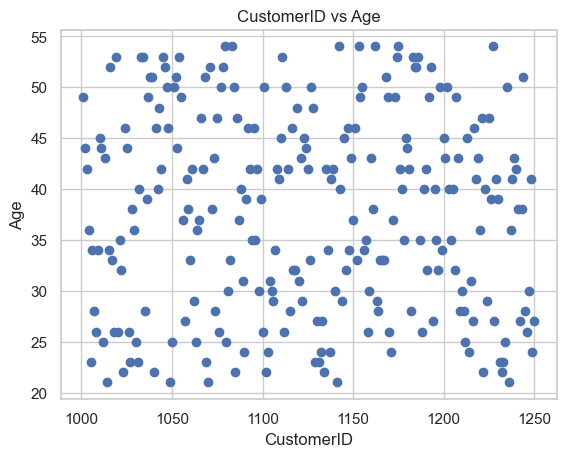

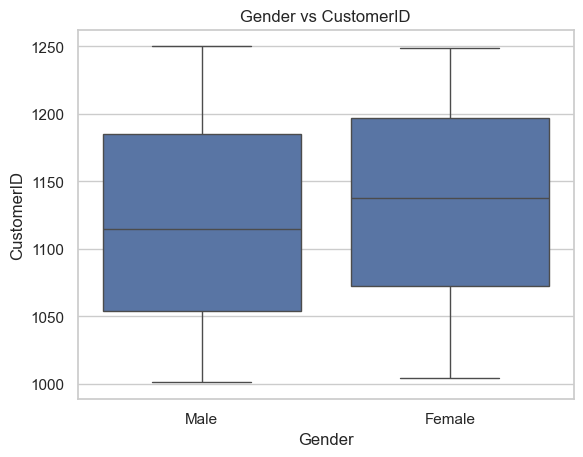

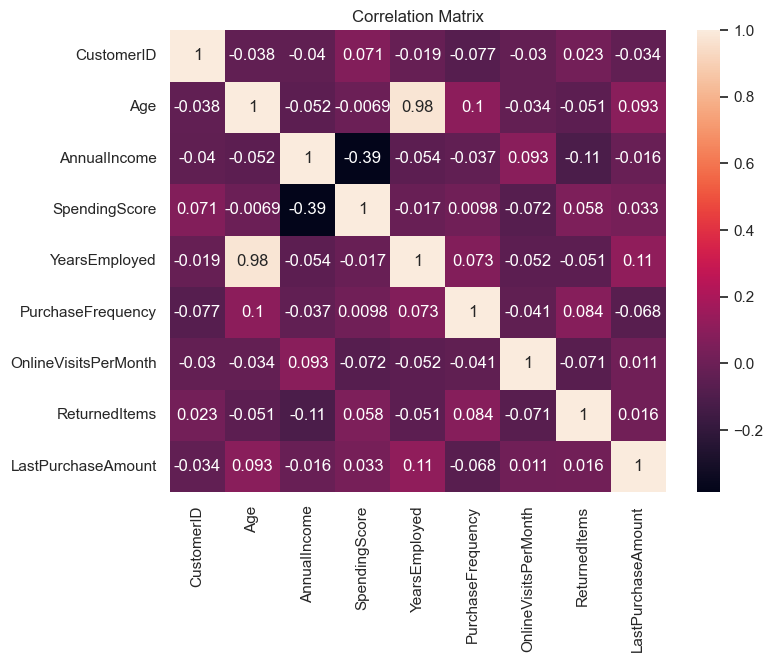


EDA Completed Successfully ✅


In [3]:
# Dataset: Uploaded CSV File

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

# Load your uploaded dataset
df = pd.read_csv("customer_analytics (1).csv")

print("First 5 Rows:")
display(df.head())

print("\nDataset Info:")
display(df.info())

print("\nStatistical Summary:")
display(df.describe())

# Data Cleaning
print("\nMissing Values Before Cleaning:")
display(df.isnull().sum())

# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Fill numerical columns with mean
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].mean())

# Fill categorical columns with mode
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Remove duplicates
df = df.drop_duplicates()

print("\nMissing Values After Cleaning:")
display(df.isnull().sum())

# Univariate Analysis

num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

# Histogram
if len(num_cols) > 0:
    plt.figure()
    plt.hist(df[num_cols[0]], bins=20)
    plt.title(f"Distribution of {num_cols[0]}")
    plt.xlabel(num_cols[0])
    plt.ylabel("Frequency")
    plt.show()

# Boxplot
if len(num_cols) > 0:
    plt.figure()
    sns.boxplot(x=df[num_cols[0]])
    plt.title(f"Boxplot of {num_cols[0]}")
    plt.show()

# Bar Chart
if len(cat_cols) > 0:
    plt.figure()
    df[cat_cols[0]].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {cat_cols[0]}")
    plt.show()
# Bivariate Analysis

# Scatter Plot
if len(num_cols) > 1:
    plt.figure()
    plt.scatter(df[num_cols[0]], df[num_cols[1]])
    plt.xlabel(num_cols[0])
    plt.ylabel(num_cols[1])
    plt.title(f"{num_cols[0]} vs {num_cols[1]}")
    plt.show()

# Boxplot (Category vs Numeric)
if len(cat_cols) > 0 and len(num_cols) > 0:
    plt.figure()
    sns.boxplot(x=cat_cols[0], y=num_cols[0], data=df)
    plt.title(f"{cat_cols[0]} vs {num_cols[0]}")
    plt.show()
    
# Correlation Heatmap
if len(num_cols) > 1:
    plt.figure(figsize=(8,6))
    corr = df.corr(numeric_only=True)
    sns.heatmap(corr, annot=True)
    plt.title("Correlation Matrix")
    plt.show()

print("\nEDA Completed Successfully")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid") 
#This code imports Pandas and NumPy for data manipulation, Matplotlib and Seaborn for visualization, and sets a white background with grid lines for all plots generated within the notebook.

In [5]:
# Load your uploaded dataset
df = pd.read_csv("customer_analytics (1).csv")

print("First 5 Rows:")
display(df.head())

print("\nDataset Info:")
display(df.info())
#This code loads your CSV file into a Pandas DataFrame and displays the first five rows alongside a structural summary of your data types and missing values.

First 5 Rows:


,CustomerID,Age,Gender,City,Education,MaritalStatus,AnnualIncome,SpendingScore,YearsEmployed,PurchaseFrequency,OnlineVisitsPerMonth,ReturnedItems,PreferredDevice,LastPurchaseAmount
0,1001,49,Male,Pune,Masters,Single,82953.0,66,23,19,9,2,Laptop,3944
1,1002,44,Male,Pune,PhD,Single,60610.0,56,22,1,23,3,Desktop,3885
2,1003,42,Male,Mumbai,Bachelors,Single,35501.0,44,18,10,29,3,Laptop,3247
3,1004,36,Female,Mumbai,Masters,Married,99312.0,36,10,12,21,3,Mobile,2028
4,1005,23,Male,Pune,Masters,Married,46980.0,56,1,18,9,3,Tablet,1100



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            255 non-null    int64  
 1   Age                   255 non-null    int64  
 2   Gender                255 non-null    object 
 3   City                  255 non-null    object 
 4   Education             243 non-null    object 
 5   MaritalStatus         255 non-null    object 
 6   AnnualIncome          243 non-null    float64
 7   SpendingScore         255 non-null    int64  
 8   YearsEmployed         255 non-null    int64  
 9   PurchaseFrequency     255 non-null    int64  
 10  OnlineVisitsPerMonth  255 non-null    int64  
 11  ReturnedItems         255 non-null    int64  
 12  PreferredDevice       255 non-null    object 
 13  LastPurchaseAmount    255 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 28.0+ KB


None

In [6]:
#generate a formatted table of summary statistics (like mean, median, and standard deviation) for all numerical columns
print("\nStatistical Summary:")
display(df.describe())


Statistical Summary:


,CustomerID,Age,AnnualIncome,SpendingScore,YearsEmployed,PurchaseFrequency,OnlineVisitsPerMonth,ReturnedItems,LastPurchaseAmount
count,255.000000,255.000000,243.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000
mean,1126.941176,37.729412,74499.901235,45.721569,14.682353,11.568627,16.078431,1.858824,2795.07451
std,72.397256,9.767842,43939.855655,17.869522,9.651664,7.077899,7.909536,1.409917,1328.77241
min,1001.000000,21.000000,16062.000000,5.000000,1.000000,1.000000,3.000000,0.000000,566.00000
25%,1064.500000,29.000000,56353.000000,34.500000,6.000000,5.000000,10.000000,1.000000,1542.50000
50%,1128.000000,38.000000,69629.000000,47.000000,15.000000,11.000000,16.000000,2.000000,2705.00000
75%,1190.500000,46.000000,84030.500000,57.500000,23.000000,18.000000,23.000000,3.000000,4001.00000
max,1250.000000,54.000000,474327.000000,95.000000,34.000000,24.000000,29.000000,4.000000,4996.00000


In [8]:
# Data Cleaning
print("\nMissing Values Before Cleaning:")
display(df.isnull().sum())

# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)
#This code identifies columns with missing data and automatically deletes any column where more than 50% of the entries are empty to ensure your analysis stays accurate.


Missing Values Before Cleaning:


CustomerID               0
Age                      0
Gender                   0
City                     0
Education               12
MaritalStatus            0
AnnualIncome            12
SpendingScore            0
YearsEmployed            0
PurchaseFrequency        0
OnlineVisitsPerMonth     0
ReturnedItems            0
PreferredDevice          0
LastPurchaseAmount       0
dtype: int64

In [11]:
# Fill numerical columns with mean
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].mean())

# Fill categorical columns with mode
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Remove duplicates
df = df.drop_duplicates()

print("\nMissing Values After Cleaning:")
display(df.isnull().sum())
#Numeric columns: Fills gaps using average values.
#Categorical columns: Fills gaps using most frequent.
#Redundancy removal: Deletes every identical row.
#Final verification: Confirms zero missing values.


Missing Values After Cleaning:


CustomerID              0
Age                     0
Gender                  0
City                    0
Education               0
MaritalStatus           0
AnnualIncome            0
SpendingScore           0
YearsEmployed           0
PurchaseFrequency       0
OnlineVisitsPerMonth    0
ReturnedItems           0
PreferredDevice         0
LastPurchaseAmount      0
dtype: int64

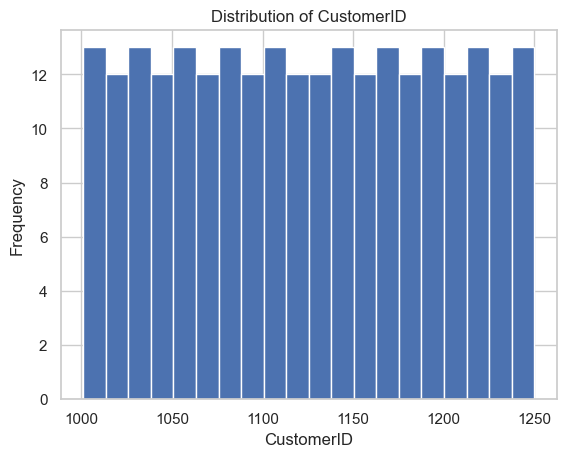

In [12]:
# Univariate Analysis
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

# Histogram
if len(num_cols) > 0:
    plt.figure()
    plt.hist(df[num_cols[0]], bins=20)
    plt.title(f"Distribution of {num_cols[0]}")
    plt.xlabel(num_cols[0])
    plt.ylabel("Frequency")
    plt.show()

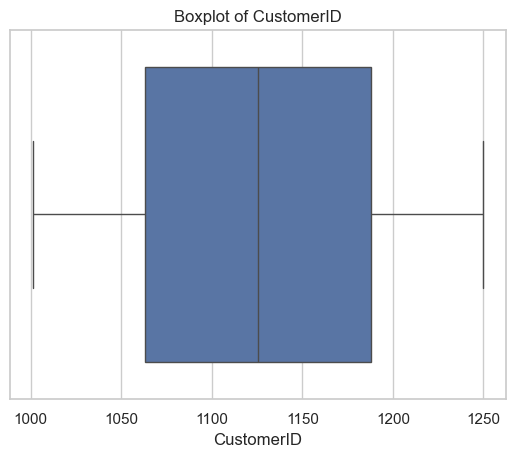

In [13]:
# Boxplot
if len(num_cols) > 0:
    plt.figure()
    sns.boxplot(x=df[num_cols[0]])
    plt.title(f"Boxplot of {num_cols[0]}")
    plt.show()


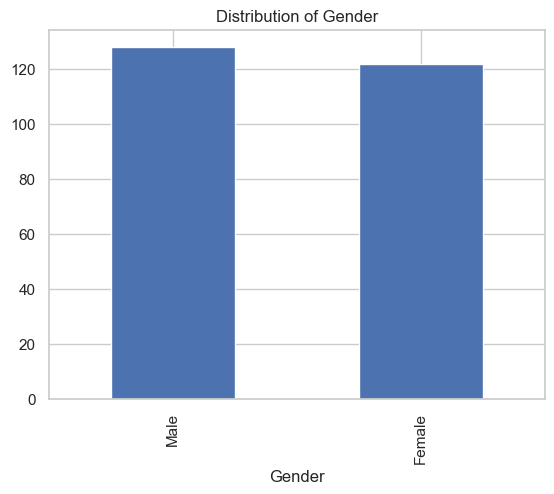

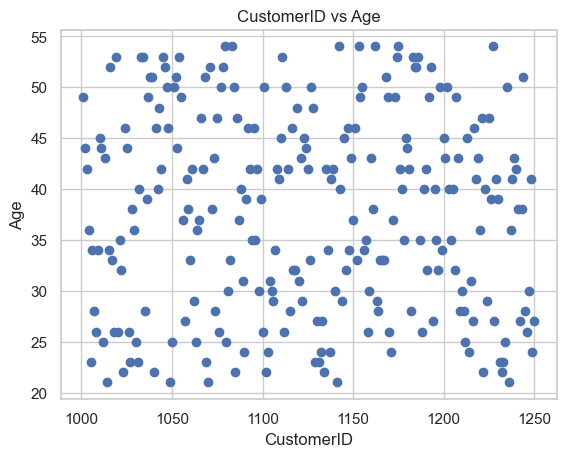

In [14]:
# Bar Chart
if len(cat_cols) > 0:
    plt.figure()
    df[cat_cols[0]].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {cat_cols[0]}")
    plt.show()
# Bivariate Analysis

# Scatter Plot
if len(num_cols) > 1:
    plt.figure()
    plt.scatter(df[num_cols[0]], df[num_cols[1]])
    plt.xlabel(num_cols[0])
    plt.ylabel(num_cols[1])
    plt.title(f"{num_cols[0]} vs {num_cols[1]}")

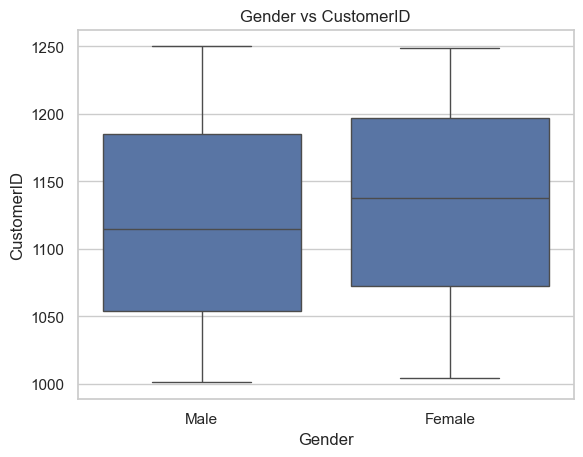

In [15]:
# Boxplot (Category vs Numeric)
if len(cat_cols) > 0 and len(num_cols) > 0:
    plt.figure()
    sns.boxplot(x=cat_cols[0], y=num_cols[0], data=df)
    plt.title(f"{cat_cols[0]} vs {num_cols[0]}")
    plt.show()

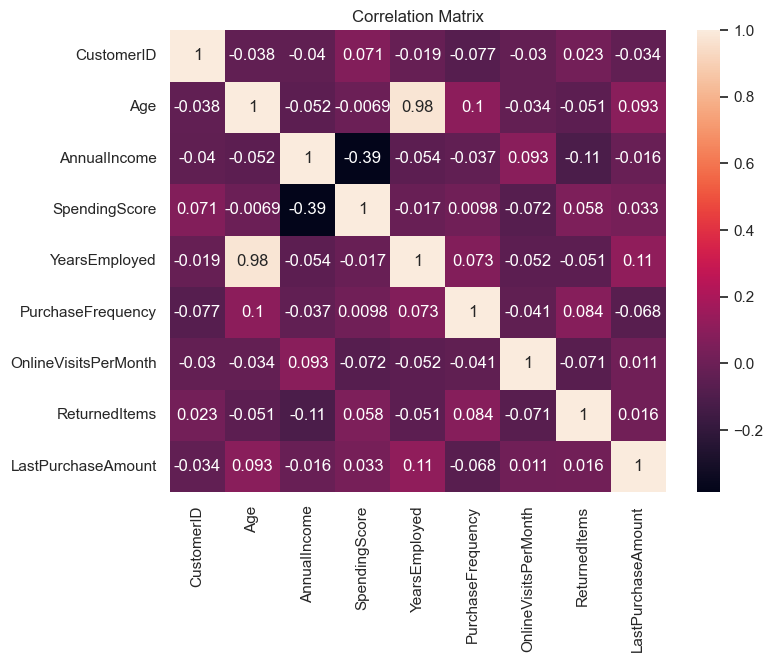


EDA Completed Successfully


In [16]:
# Correlation Heatmap
if len(num_cols) > 1:
    plt.figure(figsize=(8,6))
    corr = df.corr(numeric_only=True)
    sns.heatmap(corr, annot=True)
    plt.title("Correlation Matrix")
    plt.show()

print("\nEDA Completed Successfully")